In [4]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import sklearn 
import joblib
import os
import imgaug
from glob import glob

In [5]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image    

def comparison(actual_image, transformed_image, titles=None):
    if titles == None:
        titles = ['Actual Image', 'Transformed Image']
        
    fig, ax = plt.subplots(1, 2, figsize=(17, 17))
    ax[0].set_title(titles[0])
    if len(actual_image.shape) == 2:
        ax[0].imshow(actual_image, cmap='gray')
    else:
        ax[0].matshow(actual_image)
    ax[0].axis('off')

    ax[1].set_title(titles[1])
    if len(transformed_image.shape) == 2:
        ax[1].imshow(transformed_image, cmap='gray')
    else:
        ax[1].matshow(transformed_image)
    ax[1].axis('off')
    plt.show()

def save_al_img(file_name, path):
    A.save(file_name, path)

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

In [62]:
train_transeforms = Compose([
        A.Resize(500,500),
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
        OneOf([
            HorizontalFlip(always_apply= False, p=0.5)
        ],p=0.2)
    ], p= 1.0)


c:\Users\hsj\anaconda3\envs\ml\lib\site-packages\albumentations\imgaug\transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
c:\Users\hsj\anaconda3\envs\ml\lib\site-packages\albumentations\imgaug\transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
c:\Users\hsj\anaconda3\envs\ml\lib\site-packages\albumentations\imgaug\transforms.py:174: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Emboss instead", FutureWarning)


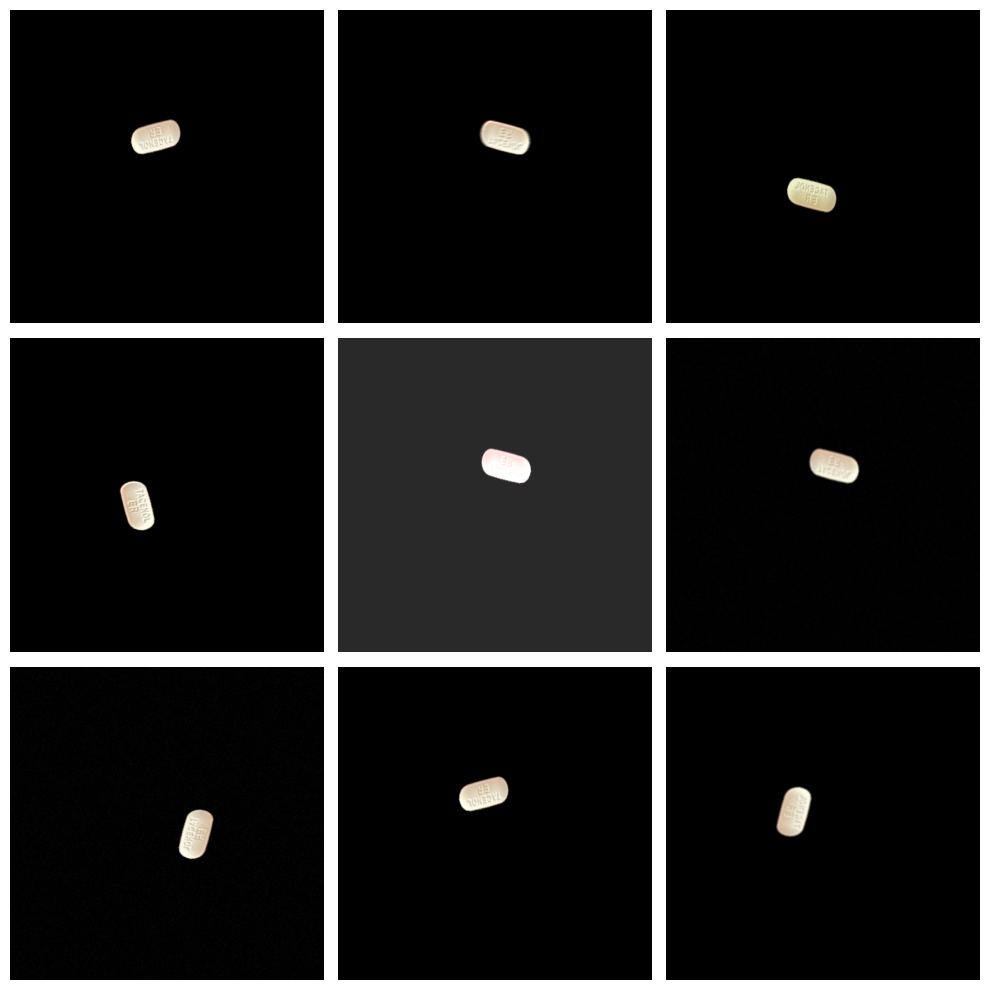

In [53]:
image= load_img("E:/appand/202200407/200500248.png")
transformed_images = []
# 9번 반복해서 이미지 변환
for _ in range(9):
    transformed_image = train_transeforms(image=np.array(image))['image']
    transformed_images.append(transformed_image)

# 3x3 서브플롯 생성 및 이미지 출력
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(transformed_images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


In [63]:
folder = os.listdir("C:/Users/hsj/Desktop/image")
imgs = glob("C:/Users/hsj/Desktop/image/*/*.png")

In [64]:
imgs, len(folder)

(['C:/Users/hsj/Desktop/image\\198701126\\198701126_1.png',
  'C:/Users/hsj/Desktop/image\\198801248\\198801248_1.png',
  'C:/Users/hsj/Desktop/image\\198801534\\198801534_1.png',
  'C:/Users/hsj/Desktop/image\\198801657\\198801657_0.png',
  'C:/Users/hsj/Desktop/image\\198901340\\198901340_0.png',
  'C:/Users/hsj/Desktop/image\\198901340\\198901340_1.png',
  'C:/Users/hsj/Desktop/image\\199001505\\199001505_1.png',
  'C:/Users/hsj/Desktop/image\\199101702\\199101702_1.png',
  'C:/Users/hsj/Desktop/image\\199301551\\199301551_0.png',
  'C:/Users/hsj/Desktop/image\\199401319\\199401319_1.png',
  'C:/Users/hsj/Desktop/image\\199501306\\199501306_1.png',
  'C:/Users/hsj/Desktop/image\\199601642\\199601642_0.png',
  'C:/Users/hsj/Desktop/image\\199601724\\199601724_1.png',
  'C:/Users/hsj/Desktop/image\\199701845\\199701845_0.png',
  'C:/Users/hsj/Desktop/image\\199701845\\199701845_1.png',
  'C:/Users/hsj/Desktop/image\\199701895\\199701895_1.png',
  'C:/Users/hsj/Desktop/image\\199801389

In [65]:
# 1. for-loop : folder
for fd in range(len(folder)):
    path = 'C:/Users/hsj/Desktop/image/'+str(folder[fd])
    file_list = os.listdir(path)
    # 선택된 폴더 내의 이미지 갯수 만큼 반복
    for ig in range(len(file_list)):
        #이미지 선택 
        img_path = path + '/' +str(file_list[ig])
        image= load_img(img_path)
        #print(img_path)
        # transform & save transfromed img
        for i in range(30):
            transformed_img = train_transeforms(image= image)['image']
            # save path
            save_path = path + '/' + str(folder[ig]) + '_' + str(ig)+'_'+str(i)+'.png'
            print(save_path)
            # save
            cv2.imwrite(save_path, transformed_img)

C:/Users/hsj/Desktop/image/198701126/198701126_0_0.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_1.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_2.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_3.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_4.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_5.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_6.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_7.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_8.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_9.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_10.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_11.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_12.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_13.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_14.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_15.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_16.png
C:/Users/hsj/Desktop/image/198701126/198701126_0_17.png
C: